# Cap. 4 - Núcleo da Linguagem Python, Parte II

Este capítulo dá continuidade a apresentação da linguagem Python que começamos no Cap. 2.

## **Módulos e pacotes**


**Módulo datetime**

Esse módulo fornece funções para lidar com datas e horas.

Para criar o um objeto do tipo data usamos:

In [ ]:
from datetime import date

In [ ]:
data_nascimento = date(1986,7,10)

In [ ]:
data_nascimento

datetime.date(1986, 7, 10)

In [ ]:
#não aceita data inválida
date(2023,2,29)

ValueError: ignored

In [ ]:
data_de_hoje = date.today()

In [ ]:
data_de_hoje

datetime.date(2023, 12, 15)

In [ ]:
# ISO 8601 format : YYYY-MM-DD
data_de_hoje.isoformat()

'2023-12-15'

In [ ]:
#0: Segunda,
#1: Terça
#2: Quarta
#3: Quinta
#4: Sexta
#5: Sábado
#6: Domingo
data_de_hoje.weekday()

4

In [ ]:
#1: Segunda,
#2: Terça
#3: Quarta
#4: Quinta
#5: Sexta
#6: Sábado
#7: Domingo
data_de_hoje.isoweekday()

5

In [ ]:
#podemos fazer comparações entre datas
data_de_hoje > data_nascimento

True

In [ ]:
data_de_hoje == data_nascimento

False

In [ ]:
delta_t = data_de_hoje - data_nascimento

In [ ]:
delta_t

datetime.timedelta(days=13672)

In [ ]:
delta_t.days

13672

In [ ]:
delta_t.days/365.

37.45753424657534

**Objeto time**

É usado para representar um horário do dia (precisão de microsegundos).

In [ ]:
from datetime import time

In [ ]:
hora_almoco = time(hour=12, minute=30, second=0, microsecond=0)

In [ ]:
hora_almoco

datetime.time(12, 30)

In [ ]:
hora_almoco.isoformat()

'12:30:00'

In [ ]:
#microsegundos: 0...999999
hora_precisa = time(4,46,36,1000000)

ValueError: ignored

In [ ]:
hora_precisa = time(4,46,36,999999)

In [ ]:
hora_precisa.isoformat()

'04:46:36.999999'

In [ ]:
time(24)

ValueError: ignored

In [ ]:
inicio_aula = time(21,20)
fim_aula = time(23,00)

In [ ]:
inicio_aula>fim_aula

False

In [ ]:
fim_aula-inicio_aula

TypeError: ignored

**Objeto datetime**

Usado para representar uma data com horário.

In [ ]:
from datetime import datetime

In [ ]:
agora = datetime.now()

In [ ]:
agora

datetime.datetime(2023, 12, 15, 0, 32, 27, 726438)

In [ ]:
agora.isoformat()

'2023-12-15T00:32:27.726438'

In [ ]:
#hora no colab
agora.ctime()

'Fri Dec 15 00:32:27 2023'

In [ ]:
nascimento = datetime(1986,7,10,20,30)

In [ ]:
delta_t = agora-nascimento

In [ ]:
delta_t

datetime.timedelta(days=13671, seconds=14547, microseconds=726438)

In [ ]:
delta_t.microseconds

726438

**Formatação de data e hora**

Para formatar um objeto desse tipo, pode usar o método *strftime*

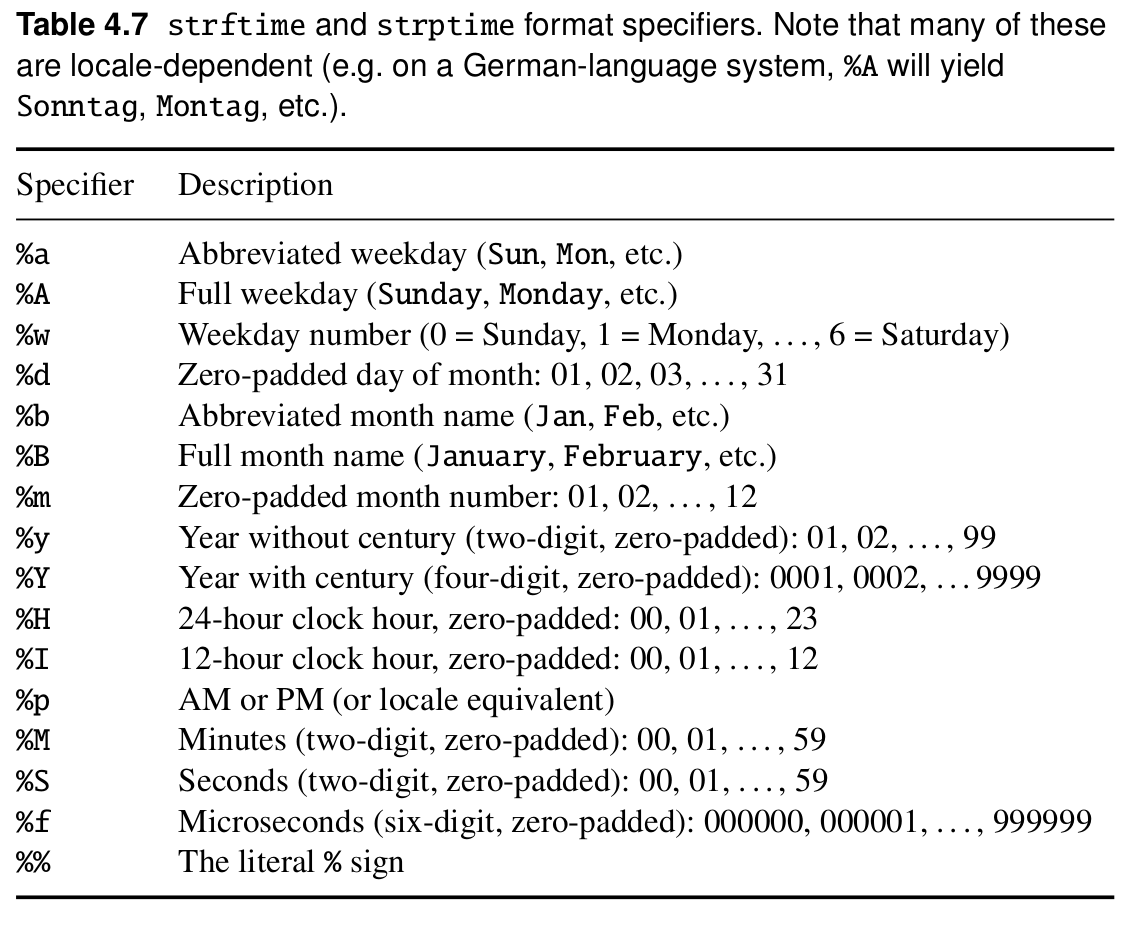

In [ ]:
nascimento = datetime(1986,7,10,20,30)

In [ ]:
nascimento.strftime('%A, %d %B %Y')

'Thursday, 10 July 1986'

In [ ]:
nascimento.strftime('%A, %d %B %Y (%H:%M)')

'Thursday, 10 July 1986 (20:30)'

In [ ]:
nascimento.strftime('%A, %d %B %Y (%Hh %Mmin)')

'Thursday, 10 July 1986 (20h 30min)'

Exemplo: Paradoxo do aniversário.

Qual é a probabilidade de encontrarmos dois indivíduos nascidos no mesmo dia num grupo de 23 pessoas?

In [ ]:
import random
import numpy as np

from datetime import date
from matplotlib import pyplot as plt

In [ ]:
data_ini = date(1,1,1)
data_fim = date(1,12,31)

In [ ]:
data_nascimento.toordinal()

725197

In [ ]:
date.fromordinal(725197)

datetime.date(1986, 7, 10)

In [ ]:
data_ini.toordinal(),data_fim.toordinal()

(1, 365)

In [ ]:
date.fromordinal(1),date.fromordinal(365)

(datetime.date(1, 1, 1), datetime.date(1, 12, 31))

In [ ]:
data_teste = date.fromordinal(random.randint(data_ini.toordinal(),data_fim.toordinal()))

In [ ]:
data_teste

datetime.date(1, 10, 12)

In [ ]:
data_teste.day,data_teste.month

(17, 6)

In [ ]:
def nascimento_aleatorio():

    data_aleatoria = date.fromordinal(random.randint(1,365))

    return (data_aleatoria.day, data_aleatoria.month)

In [ ]:
nascimento_aleatorio()

(8, 10)

In [ ]:
datas = [nascimento_aleatorio() for _ in range(23)]

In [ ]:
sorted(datas)

[(2, 2),
 (4, 7),
 (4, 12),
 (5, 8),
 (6, 10),
 (7, 9),
 (8, 9),
 (10, 2),
 (10, 9),
 (10, 10),
 (13, 8),
 (16, 1),
 (17, 4),
 (20, 4),
 (22, 4),
 (22, 9),
 (23, 6),
 (24, 4),
 (24, 10),
 (27, 4),
 (27, 5),
 (29, 11),
 (30, 4)]

In [ ]:
len(datas)

23

In [ ]:
len(set(datas))

23

In [ ]:
set_dates = set(datas)

In [ ]:
len(set_dates)

23

In [ ]:
len(set_dates)<len(datas)

False

In [ ]:
def verifica_datas(n=23):
    datas = [nascimento_aleatorio() for _ in range(n)]
    set_dates = set(datas)

    return 1 if len(set_dates)<len(datas) else 0

In [ ]:
np.mean(np.asarray([verifica_datas() for _ in range(10000)]))

0.4988

In [ ]:
ns = np.arange(1,100)

fracs = [np.mean(np.asarray([verifica_datas(ns_) for _ in range(10000)]))
         for ns_ in ns]

In [ ]:
#habilitar font Helvetica
import matplotlib as mpl
from matplotlib import font_manager as fm

!wget http://pfi.uem.br/25anos/files/Helvetica.zip
!unzip Helvetica.zip

fm.fontManager.addfont('Helvetica.ttf')
mpl.rc('font', family='Helvetica')

# rcparams = {'font.family': 'sans-serif',
#             'font.sans-serif': ['Helvetica'],
#             'axes.labelsize': 28,
#             'axes.titlesize': 28,
#             'legend.fontsize': 20,
#             'ytick.right': 'off',
#             'xtick.top': 'off',
#             'ytick.left': 'on',
#             'xtick.bottom': 'on',
#             'xtick.labelsize': '25',
#             'ytick.labelsize': '25',
#             'axes.linewidth': 2.5,
#             'xtick.major.width': 1.8,
#             'xtick.minor.width': 1.8,
#             'xtick.major.size': 10,
#             'xtick.minor.size': 5,
#             'xtick.major.pad': 10,
#             'xtick.minor.pad': 10,
#             'ytick.major.width': 1.8,
#             'ytick.minor.width': 1.8,
#             'ytick.major.size': 10,
#             'ytick.minor.size': 5,
#             'ytick.major.pad': 10,
#             'ytick.minor.pad': 10,
#             'axes.labelpad': 15,
#             'axes.titlepad': 15,
#             'axes.spines.right': False,
#             'axes.spines.top': False
#             }
# mpl.rcParams.update(rcparams)

--2023-12-15 00:50:33--  http://pfi.uem.br/25anos/files/Helvetica.zip
Resolving pfi.uem.br (pfi.uem.br)... 186.233.153.195
Connecting to pfi.uem.br (pfi.uem.br)|186.233.153.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1022264 (998K) [application/zip]
Saving to: ‘Helvetica.zip’

Helvetica.zip       100%[===================>] 998.30K   959KB/s    in 1.0s    

2023-12-15 00:50:35 (959 KB/s) - ‘Helvetica.zip’ saved [1022264/1022264]

Archive:  Helvetica.zip
  inflating: Helvetica.ttf           
  inflating: HelveticaBold.ttf       
  inflating: HelveticaBoldOblique.ttf  
  inflating: HelveticaLight.ttf      
  inflating: HelveticaLightOblique.ttf  
  inflating: HelveticaOblique.ttf    


Text(25, 0.5, ' Para 23 pessoas a probabilidade é de 50%!')

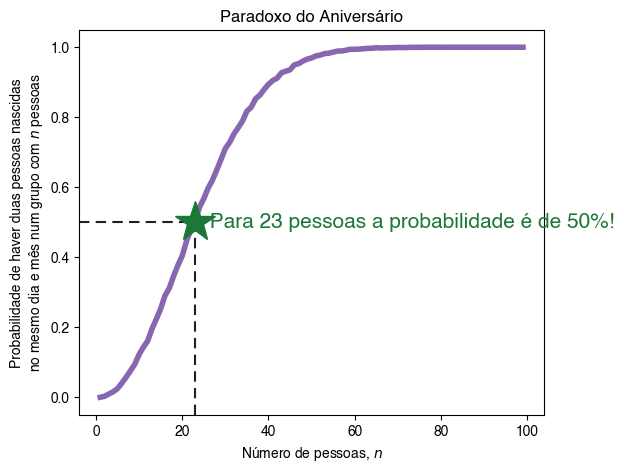

In [ ]:
plt.figure(figsize=(12/2,10/2))
plt.plot(ns,fracs,'-', lw=4, color='#54278f', alpha=0.7)
plt.title('Paradoxo do Aniversário')
plt.xlabel('Número de pessoas, $n$')
plt.ylabel('Probabilidade de haver duas pessoas nascidas\n'\
            + 'no mesmo dia e mês num grupo com $n$ pessoas')
plt.axvline(23,ymax=0.5,color='#202020',dashes=(5,3))
plt.axhline(0.5,xmax=0.25,color='#202020',dashes=(5,3))

plt.plot([23],[0.5],'*',ms=30,color='#1b7837')
plt.text(25,0.5,' Para 23 pessoas a probabilidade é de 50%!',
         fontsize=15,ha='left',va='center',
         color='#1b7837')

## **Programação orientada a objetos**


Os estilos de programação podem ser divididos em duas categorias amplas:

* Procedural
* Orientada a objetos

Até agora temos usado o primeiro paradigma, o qual tem como característica principal o uso de funções. Essas funções recebem e retornam valores, mas não armazenam dados.

O paradigma orientado é caracterizado pelo uso de classes que definem objetos e seus métodos.

Apenas para ilustrar a ideia, e lembrando que tudo em Python é um objeto, considere o caso de uma variável string. Essa variável pode ser vista como um objeto da classe str. Este objeto armazena dados (o conjunto de caracteres) e fornece diversos métodos para modificar e manipular esses dados.





In [ ]:
# a pode ser pensado como um objeto da classe str
a = 'hello , aloha , goodbye , aloha'

In [ ]:
# capitalize é um método do objeto str
a.capitalize()

'Hello , aloha , goodbye , aloha'

In [ ]:
# split é outro
a.split(',')

['hello ', ' aloha ', ' goodbye ', ' aloha']

Até mesmo o caso de indexação de uma lista pode ser pensado como a ação de um método no objeto da classe list:

In [ ]:
b = [10, 20, 30, 40, 50]

In [ ]:
b[4]

50

In [ ]:
b.__getitem__(4)

50

Uma das vantagens do paradigma de orientação a objeto é a facilidade no reuso de código (usando herança) e também uma maior compartimentação dos problemas.

Para ilustrar o uso desse paradigma, vamos considerar o caso de um programa de banco e duas classes associadas:

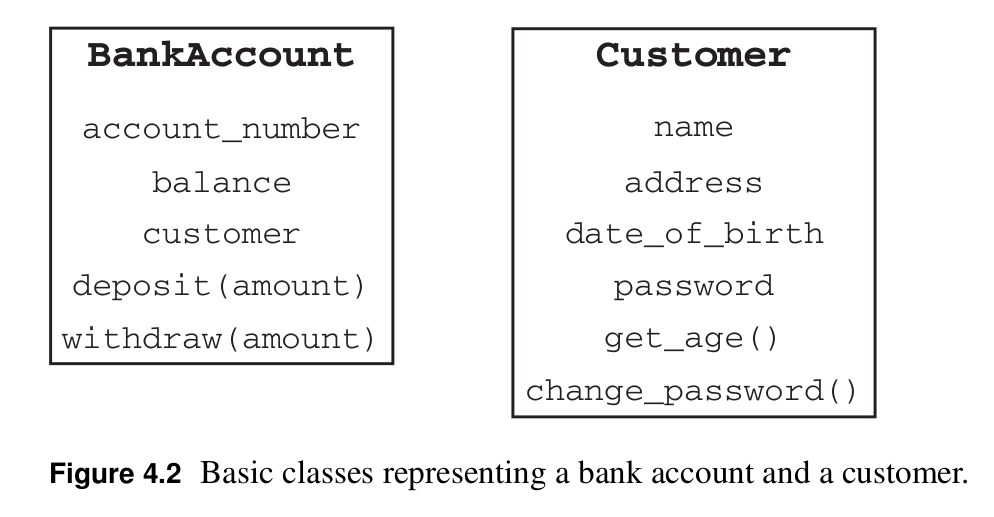

**Definindo classes**

* Para definir uma classe, usamos a palavra-chave *class*;
* Para criar métodos em uma classe, usamos a palavra-chave *def*;
* O primeiro argumento dos métodos de uma classe é sempre chamado *self*, sendo um nome usado para se referir ao próprio objeto;
* Classes têm um método especial *\_\_init\_\_* que é executado sempre que um objeto da classe é criado (instanciado);
* Variáveis definidas dentro dos métodos de uma classe como *self.NOME* são os atributos do objeto ou *instance variables*;
* Variáveis definidas dentro da classe, mas fora de métodos são chamadas de variáveis da classe (*class variable*)


In [ ]:
#Usamos o nome para classes usa o CamelCase.
class ContaBancaria:
    """ Classe para representar uma conta bancária."""

    moeda = 'R$'

    def __init__(self, cliente, numero_conta, saldo=0):
        """
        Inicializa a classe com a cliente, número da conta
        e valor inicial (0 por padrão)
        """
        self.cliente = cliente
        self.numero_conta = numero_conta
        self.saldo = saldo
        # print('passou aqui')

    def deposito(self, quantidade):
        """Faz um depósito."""
        if quantidade > 0:
            self.saldo += quantidade
        else:
            print('Depósito inválido:', quantidade)

    def retirada(self, quantidade):
        """Faz um saque."""
        if quantidade > 0:
            if quantidade > self.saldo:
                print('Saldo insuficiente')
            else:
                self.saldo -= quantidade
        else:
            print ('Quantidade de retirada inválida:', quantidade)


In [ ]:
# cria um objeto do tipo ContaBancaria ou uma
# instância da classe ContaBancaria
# aqui, o método __init__ será executado
minha_conta = ContaBancaria('Haroldo V. Ribeiro', 101135)

In [ ]:
minha_conta

**Métodos e Atributos**

Estão acessíveis via dot notation:

In [ ]:
minha_conta.numero_conta

101135

In [ ]:
minha_conta.cliente

'Haroldo V. Ribeiro'

In [ ]:
minha_conta.saldo

0

In [ ]:
minha_conta.deposito(253)

In [ ]:
minha_conta.saldo

253

In [ ]:
minha_conta.retirada(120)

In [ ]:
minha_conta.saldo

133

Podemos incluir um outro método para mostrar o saldo:

In [ ]:
#Usamos o nome para classes usa o CamelCase.
class ContaBancaria:
    """ Classe para representar uma conta bancária."""

    moeda = 'R$'

    def __init__(self, cliente, numero_conta, saldo=0):
        """
        Inicializa a classe com a cliente, número da conta
        e valor inicial (0 por padrão)
        """
        self.cliente = cliente
        self.numero_conta = numero_conta
        self.saldo = saldo
        # print('passou aqui')

    def deposito(self, quantidade):
        """Faz um depósito."""
        if quantidade > 0:
            self.saldo += quantidade
        else:
            print('Depósito inválido:', quantidade)

    def retirada(self, quantidade):
        """Faz um saque."""
        if quantidade > 0:
            if quantidade > self.saldo :
                print('Saldo insuficiente')
            else:
                self.saldo -= quantidade
        else:
            print ('Quantidade de retirada inválida:', quantidade)
    def extrato(self):
        """ Imprime o saldo. """
        print(f'O saldo da conta número: {self.numero_conta:d} é '+
              f'{self.moeda:s} {self.saldo:.2f}')

In [ ]:
minha_conta = ContaBancaria('Haroldo V. Ribeiro', 101135)

In [ ]:
minha_conta.extrato()

O saldo da conta número: 101135 é R$ 0.00


In [ ]:
minha_conta.deposito(200)

In [ ]:
minha_conta.extrato()

O saldo da conta número: 101135 é R$ 200.00


In [ ]:
minha_conta.retirada(600)

Saldo insuficiente


In [ ]:
minha_conta.retirada(150)
minha_conta.extrato()

O saldo da conta número: 101135 é R$ 50.00


Vamos agora criar uma classe para representar o cliente:

In [ ]:
from datetime import datetime

class Cliente:
    """ Uma classe para representar cliente de banco."""

    def __init__(self, nome, endereco, data_nascimento):
        self.nome = nome
        self.endereco = endereco
        self.data_nascimento = datetime.strptime(data_nascimento, '%d/%m/%Y')
        self.password = '1234'

    def idade(self):
        """Calcula a idade do cliente."""
        hoje = datetime.today()
        try:
            nascimento = self.data_nascimento.replace(year=hoje.year)
        except ValueError :
            # nascimento é 29/2 mas o ano não é bissexto
            nascimento = self.data_nascimento.replace(year=hoje.year,
                                    day=self.data_nascimento.day - 1)
        if nascimento > hoje:
            return hoje.year - self.data_nascimento.year - 1
        return hoje.year - self.data_nascimento.year

In [ ]:
cliente_haroldo = Cliente('Haroldo V. Ribeiro','Av. Colombo 5790', '10/7/1986')

In [ ]:
cliente_haroldo.nome,cliente_haroldo.endereco,\
cliente_haroldo.data_nascimento,cliente_haroldo.password

('Haroldo V. Ribeiro',
 'Av. Colombo 5790',
 datetime.datetime(1986, 7, 10, 0, 0),
 '1234')

In [ ]:
cliente_haroldo.idade()

37

Podemos passar o objeto Cliente para o objeto ContaBancaria:

In [ ]:
nova_conta = ContaBancaria(cliente_haroldo,19323,10)

In [ ]:
#note que o cliente do objeto ContaBancaria agora é um
#objeto do tipo cliente
nova_conta.cliente

In [ ]:
nova_conta.numero_conta

19323

In [ ]:
nova_conta.cliente.nome

'Haroldo V. Ribeiro'

In [ ]:
nova_conta.cliente.data_nascimento

datetime.datetime(1986, 7, 10, 0, 0)

In [ ]:
nova_conta.cliente.idade()

37

**Herança de classes**

Ao criar uma classe, podemos passar outras classes como "argumento". Com isso a classe criada será uma subclasse e vai herdar os métodos e atributos das classes passadas.

Por exemplo, suponha que desejamos criar dois tipos de conta: poupança e corrente:

In [ ]:
class ContaPoupanca(ContaBancaria):
    """ Uma classe para conta poupança """

    def __init__(self, cliente, numero_conta, taxa_juro, saldo=0):
        """ Inicializa a conta. """
        self.taxa_juro = taxa_juro
        super().__init__(cliente, numero_conta, saldo)
    def rendimentos(self):
        """ Incrementa os juros da conta. """
        self.saldo *= (1. + self.taxa_juro / 100)

Note que a classe cria um novo atributo 'taxa_juro' e um novo método 'rendimentos'. Note ainda o uso do 'super()' que permite acessar os atributos e métodos da classe pai. No caso de herança de mais de uma classe, usamos 'super(CLASSE_PAI)'

In [ ]:
poupanca_teste = ContaPoupanca(cliente_haroldo,12312,9.5,10)

In [ ]:
#note que os atributos são herdados
poupanca_teste.saldo,poupanca_teste.numero_conta

(10, 12312)

In [ ]:
#o mesmo acontece para os métodos
poupanca_teste.deposito(100)
poupanca_teste.saldo

110

In [ ]:
poupanca_teste.rendimentos()
poupanca_teste.saldo

120.45

Agora a conta corrente

In [ ]:
class ContaCorrente(ContaBancaria):
    """ Classe para conta corrente."""
    def __init__(self, cliente, numero_conta, taxa_anual,
                   limite_de_transacao, saldo=0):
        """ Initializa a conta."""
        self.taxa_anual = taxa_anual
        self.limite_de_transacao = limite_de_transacao
        super().__init__(cliente, numero_conta, saldo)

    def retirada(self, quantidade):
        """
        Faz saque verificando o limite máximo.
        """
        if quantidade <= 0:
            print('Valor inválido:', quantidade)
            return
        if quantidade > self.saldo :
            print('Saldo insuficiente')
            return
        if quantidade > self.limite_de_transacao :
            print(f'{self.moeda:s}{quantidade:.2f} ultrapassa o limite de '
                  + f'{self.moeda:s}{self.limite_de_transacao:.2f}')
            return
        self.saldo -= quantidade

    def cobra_taxa(self):
        """ Cobra a taxa anual ."""
        self.saldo = max(0., self.saldo - self.taxa_anual)

Note que a classe sobrescreve o método retirada da classe pai.

In [ ]:
minha_conta_velha = ContaBancaria(cliente_haroldo,121312,400)

In [ ]:
minha_conta_c = ContaCorrente(cliente_haroldo,121312,89,100,400)

In [ ]:
minha_conta_c.retirada(200)

R$200.00 ultrapassa o limite de R$100.00


In [ ]:
minha_conta_c.saldo

400

In [ ]:
#notar a diferença entre os dois métodos
print(minha_conta_velha.saldo)
minha_conta_velha.retirada(200)
print(minha_conta_velha.saldo)

400
200


*Exemplo E4.19:* Modelo [*random-coil*](https://en.wikipedia.org/wiki/Random_coil) para cadeias poliméricas:

* Considera que as cadeias poliméricas são $N$ segmentos $\vec{r}_i = (\Delta x,\Delta y,\Delta z)$ com orientação aleatória e tamanho fixo ($a = |\vec{r}_i| = \sqrt{\Delta x^2+\Delta y^2+\Delta z^2}$.



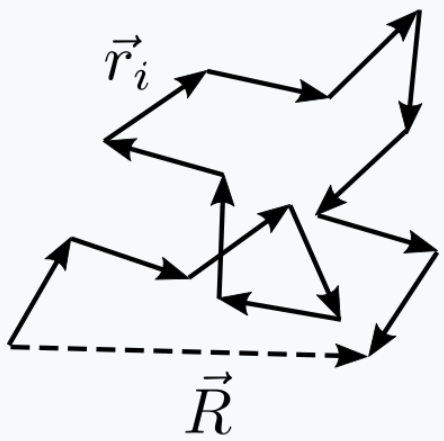

Note que

$$
\vec{R} = \sum_i^{N} \vec{r_i}
$$

Vamos implementar uma classe que cria um objeto do tipo polímero e verificar que a distribuição do módulo do raio $|\vec{R}|$:

$$
P(R) = 4\pi R^2 \left(\frac{3}{2\pi\langle R^2\rangle}\right) \exp\left(-\frac{3 R^2}{2\langle R^2\rangle}\right)
$$

com $\langle R^2\rangle = N a^2$

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math
import random

class Polymer:
    """ Classe para representar polímeros no modelo random-coil. """

    def __init__(self, N, a):
        """
        Inicializa um Polymer com N segmentos de comprimento a.

        """

        self.N, self.a = N, a
        # self.xyz lista com os segmentos
        self.xyz = [(None, None, None)] * N
        # soma dos vetores
        self.R = None
        # gera os vetores
        self.make_polymer()

    def make_polymer(self):
        """
        Gera os segmentos e o raio R

        """

        # Posição inicial é (0,0,0).
        self.xyz[0] = x, y, z = cx, cy, cz = 0., 0., 0.
        for i in range(1, self.N):
            # Escolhe uma orientação aleatória via coordenadas polares.
            theta = math.acos(2 * random.random() - 1)
            phi = random.random() * 2. * math.pi

            # Incrementa na posição inicial.
            #
            x += self.a * math.sin(theta) * math.cos(phi)
            y += self.a * math.sin(theta) * math.sin(phi)
            z += self.a * math.cos(theta)

            # Armazena o segmento e soma em cx, cy, cz
            # para calcular o centro de massa
            self.xyz[i] = x, y, z
            cx, cy, cz = cx + x, cy + y, cz + z

        # Calcula o centro de massa
        cx, cy, cz = cx / self.N, cy / self.N, cz / self.N
        # Calcula o vetor R
        self.R = x, y, z

        # Centra o polímero no seu centro de massa.
        for i in range(self.N):
            self.xyz[i] = self.xyz[i][0]-cx,self.xyz[i][1]-cy,self.xyz[i][2]-cz

    def calc_Rg(self):
        """
        Calcula o raio de giração do polímero.
        """

        self.Rg = 0.
        for x,y,z in self.xyz:
            self.Rg += x**2 + y**2 + z**2
        self.Rg = math.sqrt(self.Rg / self.N)
        return self.Rg

Note que usamos coordenadas esféricas para gerar os vetores:

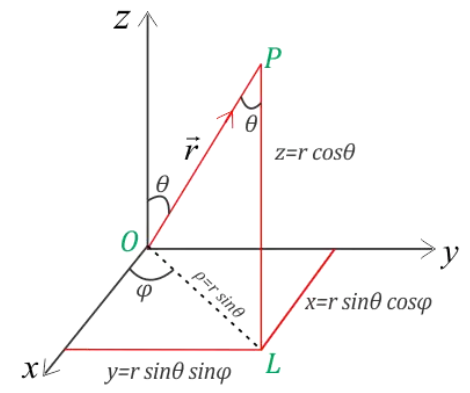

In [ ]:
polimero = Polymer(100,1)

In [ ]:
polimero.R

(-5.444936411408623, -3.2901812713388106, -2.93200602537484)

In [ ]:
polimero.calc_Rg()

4.471662914779343

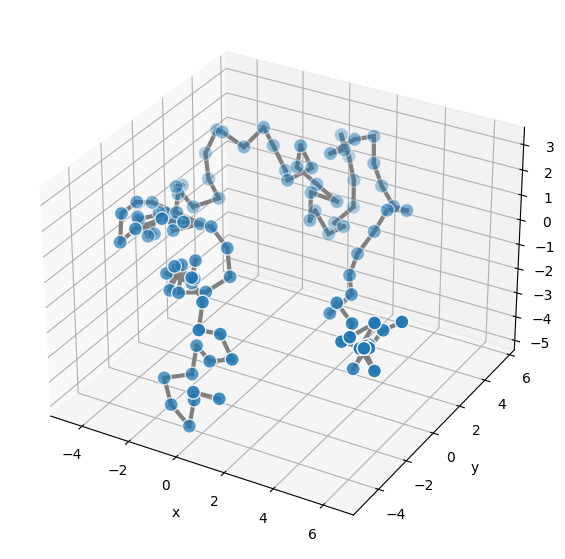

In [ ]:
nos_polimero = np.asarray(polimero.xyz)
ligacoes = np.array([(u,v) for u, v in zip(nos_polimero[0:-1],nos_polimero[1:])])

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(*nos_polimero.T, s=100, ec="w")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for ligacao in ligacoes:
    ax.plot(*ligacao.T, color="tab:gray",lw=3)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Scatter3d(
    x=nos_polimero.T[0],
    y=nos_polimero.T[1],
    z=nos_polimero.T[2],
    marker=dict(
        size=4,
        color=nos_polimero.T[2],
        colorscale='Viridis',
    ),
    line=dict(
        color='darkblue',
        width=2
    )
))

fig.show()

In [ ]:
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import numpy as np
import math
import random

class Polymer:
    """ Classe para representar polímeros no modelo random-coil. """

    def __init__(self, N, a):
        """
        Inicializa um Polymer com N segmentos de comprimento a.

        """

        self.N, self.a = N, a
        # self.xyz lista com os segmentos
        self.xyz = [(None, None, None)] * N
        # soma dos vetores
        self.R = None
        # gera os vetores
        self.make_polymer()

    def make_polymer(self):
        """
        Gera os segmentos e o raio R

        """

        # Posição inicial é (0,0,0).
        self.xyz[0] = x, y, z = cx, cy, cz = 0., 0., 0.
        for i in range(1, self.N):
            # Escolhe uma orientação aleatória via coordenadas polares.
            theta = math.acos(2 * random.random() - 1)
            phi = random.random() * 2. * math.pi

            # Incrementa na posição inicial.
            #
            x += self.a * math.sin(theta) * math.cos(phi)
            y += self.a * math.sin(theta) * math.sin(phi)
            z += self.a * math.cos(theta)

            # Armazena o segmento e soma em cx, cy, cz
            # para calcular o centro de massa
            self.xyz[i] = x, y, z
            cx, cy, cz = cx + x, cy + y, cz + z

        # Calcula o centro de massa
        cx, cy, cz = cx / self.N, cy / self.N, cz / self.N
        # Calcula o vetor R
        self.R = x, y, z

        # Centra o polímero no seu centro de massa.
        for i in range(self.N):
            self.xyz[i] = self.xyz[i][0]-cx,self.xyz[i][1]-cy,self.xyz[i][2]-cz

    def calc_Rg(self):
        """
        Calcula o raio de giração do polímero.
        """

        self.Rg = 0.
        for x,y,z in self.xyz:
            self.Rg += x**2 + y**2 + z**2
        self.Rg = math.sqrt(self.Rg / self.N)
        return self.Rg

    def visualiza(self):
        """
        Cria uma visualização para o polímero.
        """
        nos_polimero = np.asarray(self.xyz)
        ligacoes = np.array([(u,v) for u, v in zip(nos_polimero[0:-1],nos_polimero[1:])])

        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(*nos_polimero.T, s=100, ec="w")
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        for ligacao in ligacoes:
            ax.plot(*ligacao.T, color="tab:gray",lw=3)

    def visualiza_interativa(self):
        """
        Cria uma visualização para o polímero.
        """
        nos_polimero = np.asarray(self.xyz)
        fig = go.Figure(data=go.Scatter3d(
            x=nos_polimero.T[0],
            y=nos_polimero.T[1],
            z=nos_polimero.T[2],
            marker=dict(
                size=4,
                color=nos_polimero.T[2],
                colorscale='Viridis',
            ),
            line=dict(
                color='darkblue',
                width=2
            )
        ))

        fig.show()

In [ ]:
polimero = Polymer(1000,1)

In [ ]:
polimero.visualiza_interativa()

In [ ]:
polimero = Polymer(500,1)
polimero.visualiza_interativa()

In [ ]:
Polymer(100,1).R

(-1.0975912833343053, 6.919917514470317, 4.092690006760305)

In [ ]:
sum([d*d for d in Polymer(100,1).R])**0.5

14.008123490427806

In [ ]:
N, a = 100, 1
Rs = [sum([d*d for d in Polymer(N,a).R])**0.5 for _ in range(10000)]

Text(0, 0.5, 'P(R)')

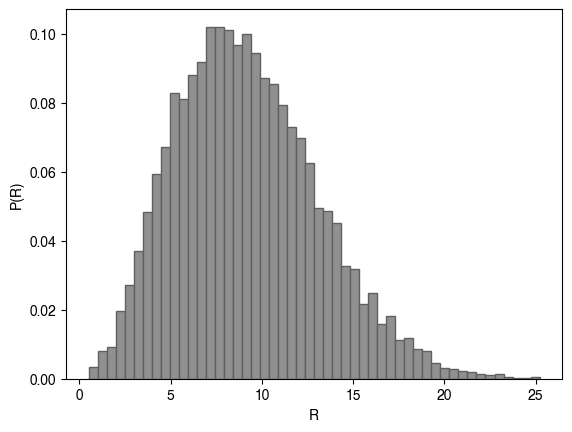

In [ ]:
plt.hist(Rs, 50, density=True,lw=1,color='#909090',edgecolor='#606060');
plt.xlabel('R')
plt.ylabel('P(R)')

In [ ]:
Rs_range = np.linspace(0,25,1000)
lr2l = N*(a**2)
P_teo = (4*np.pi*Rs_range**2)*((3/(2*np.pi*lr2l))**(3/2.))\
        *np.exp(-3*Rs_range**2/(2*lr2l))

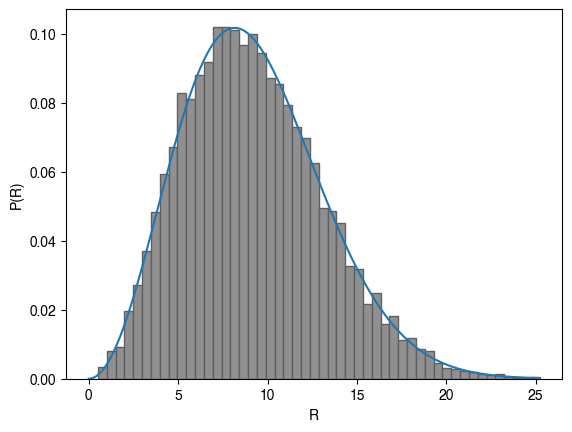

In [ ]:
plt.hist(Rs, 50, density=True,lw=1,color='#909090',edgecolor='#606060');
plt.xlabel('R')
plt.ylabel('P(R)')
plt.plot(Rs_range,P_teo)

In [ ]:
import tqdm

In [ ]:
import time

In [ ]:
for i in tqdm.notebook.tqdm(range(10)):
    # print(i)
    time.sleep(0.4)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:21<00:00, 463.58it/s]


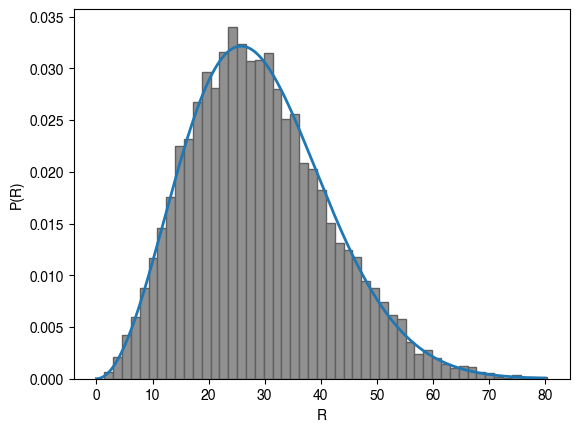

In [ ]:
N, a = 1000, 1
Rs = [sum([d*d for d in Polymer(N,a).R])**0.5 for _ in tqdm.tqdm(range(10000))]

Rs_range = np.linspace(0,80,1000)
lr2l = N*(a**2)
P_teo = (4*np.pi*Rs_range**2)*((3/(2*np.pi*lr2l))**(3/2.))\
        *np.exp(-3*Rs_range**2/(2*lr2l))

plt.hist(Rs, 50, density=True,lw=1,color='#909090',edgecolor='#606060');
plt.xlabel('R')
plt.ylabel('P(R)')
plt.plot(Rs_range,P_teo,lw=2)